# Phase 3: Conduct image classification using the neural network approach

Device: cpu
Num classes: 15
Input size: 16384
Epoch 1/40 | Train Loss: 2.6587 | Train Acc: 0.1448 | Val Loss: 2.5024 | Val Acc: 0.1993
Epoch 2/40 | Train Loss: 2.5055 | Train Acc: 0.1943 | Val Loss: 2.4399 | Val Acc: 0.2100
Epoch 3/40 | Train Loss: 2.4367 | Train Acc: 0.2143 | Val Loss: 2.4027 | Val Acc: 0.2113
Epoch 4/40 | Train Loss: 2.3836 | Train Acc: 0.2325 | Val Loss: 2.4046 | Val Acc: 0.2307
Epoch 5/40 | Train Loss: 2.3475 | Train Acc: 0.2403 | Val Loss: 2.3760 | Val Acc: 0.2240
Epoch 6/40 | Train Loss: 2.2797 | Train Acc: 0.2650 | Val Loss: 2.3776 | Val Acc: 0.2213
Epoch 7/40 | Train Loss: 2.2475 | Train Acc: 0.2750 | Val Loss: 2.3767 | Val Acc: 0.2467
Epoch 8/40 | Train Loss: 2.2155 | Train Acc: 0.2822 | Val Loss: 2.3910 | Val Acc: 0.2280
Epoch 9/40 | Train Loss: 2.1741 | Train Acc: 0.3033 | Val Loss: 2.3754 | Val Acc: 0.2440
Epoch 10/40 | Train Loss: 2.1400 | Train Acc: 0.3160 | Val Loss: 2.4074 | Val Acc: 0.2387
Epoch 11/40 | Train Loss: 1.9760 | Train Acc: 0.3788 | Val Loss

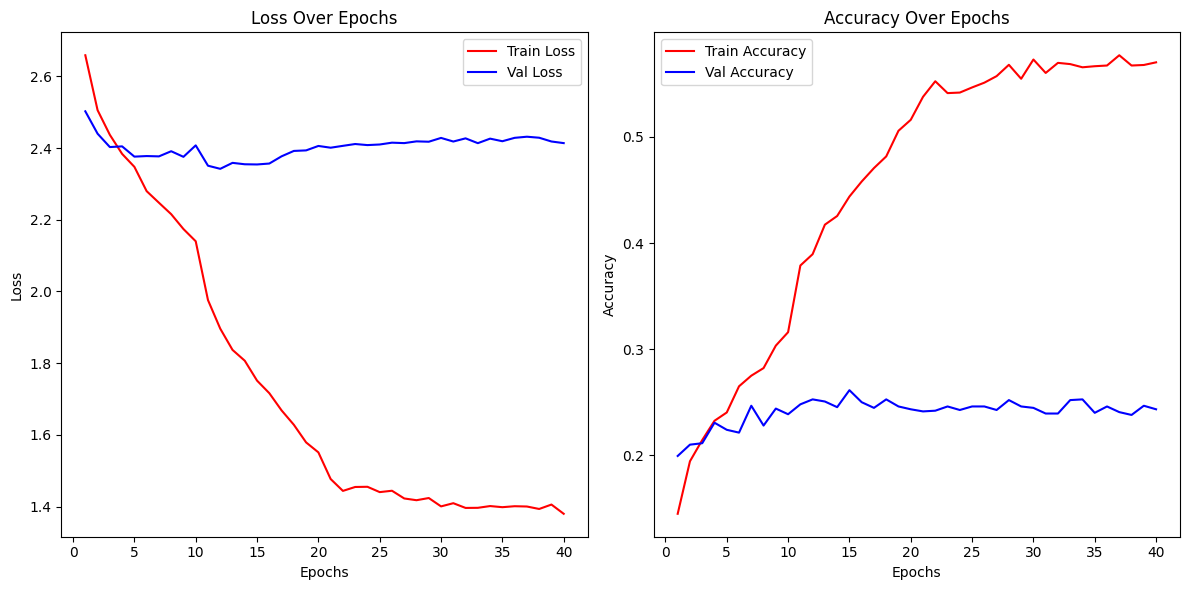

Test Accuracy: 0.2433

Neural Network Classifier Performance:

              precision    recall  f1-score   support

   n01768244     0.3542    0.3400    0.3469       100
   n02074367     0.2800    0.3500    0.3111       100
   n02099712     0.2073    0.1700    0.1868       100
   n02123045     0.1651    0.1800    0.1722       100
   n02123394     0.2021    0.1900    0.1959       100
   n02190166     0.2830    0.3000    0.2913       100
   n02206856     0.1553    0.1600    0.1576       100
   n02226429     0.1261    0.1400    0.1327       100
   n02423022     0.3217    0.3700    0.3442       100
   n02791270     0.2561    0.2100    0.2308       100
   n02917067     0.4426    0.5400    0.4865       100
   n03085013     0.1798    0.1600    0.1693       100
   n03126707     0.2857    0.2400    0.2609       100
   n03179701     0.1758    0.1600    0.1675       100
   n03250847     0.1538    0.1400    0.1466       100

    accuracy                         0.2433      1500
   macro avg     

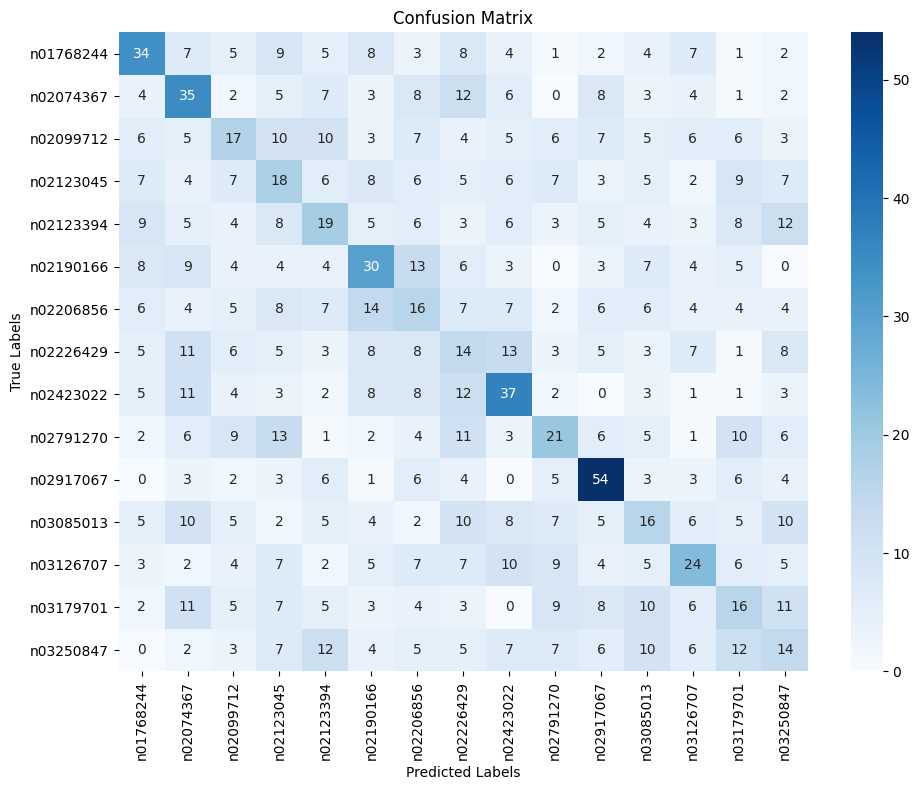


Saved outputs to:
 - /Users/maheshnilewar/Documents/Github/image_classification/results/models/phase3_fcnn_pytorch.pth
 - /Users/maheshnilewar/Documents/Github/image_classification/results/figures/phase3_fcnn_pytorch_training_curves.png
 - /Users/maheshnilewar/Documents/Github/image_classification/results/metrics/phase3_fcnn_pytorch_classification_report.txt
 - /Users/maheshnilewar/Documents/Github/image_classification/results/figures/phase3_fcnn_pytorch_confusion_matrix.png
 - /Users/maheshnilewar/Documents/Github/image_classification/results/metrics/phase3_fcnn_pytorch_confusion_matrix.csv
 - /Users/maheshnilewar/Documents/Github/image_classification/results/metrics/phase3_fcnn_pytorch_summary.json


In [8]:
# =========================
# Phase 3 (PyTorch FCNN) - your code + saving outputs
# Saves to:
# /Users/maheshnilewar/Documents/Github/image_classification/results
# =========================

import os
import json
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim

from torchvision import datasets, transforms
from torch.utils.data import DataLoader

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


# ---------- Device ----------
device_type = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Device:", device_type)

# ---------- Dataset directories ----------
train_dir = "/Users/maheshnilewar/Documents/Github/image_classification/train"
test_dir  = "/Users/maheshnilewar/Documents/Github/image_classification/test"

# ---------- Results directories (YOUR LOCATION) ----------
RESULTS_DIR = "/Users/maheshnilewar/Documents/Github/image_classification/results"
FIG_DIR = os.path.join(RESULTS_DIR, "figures")
METRICS_DIR = os.path.join(RESULTS_DIR, "metrics")
MODELS_DIR = os.path.join(RESULTS_DIR, "models")
os.makedirs(FIG_DIR, exist_ok=True)
os.makedirs(METRICS_DIR, exist_ok=True)
os.makedirs(MODELS_DIR, exist_ok=True)

run_name = "phase3_fcnn_pytorch"


# ---------- Image transformations ----------
image_transforms = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.Grayscale(num_output_channels=1),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])
])

# ---------- Load dataset ----------
train_data = datasets.ImageFolder(root=train_dir, transform=image_transforms)
val_data   = datasets.ImageFolder(root=test_dir, transform=image_transforms)

# ---------- Class details ----------
categories = train_data.classes
num_categories = len(categories)
print("Num classes:", num_categories)

# ---------- DataLoaders ----------
train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
val_loader   = DataLoader(val_data, batch_size=32, shuffle=False)

# ---------- Get input size ----------
temp_image, _ = next(iter(train_loader))
_, channels, height, width = temp_image.shape
input_size = height * width * channels
print("Input size:", input_size)


# ---------- Define Neural Network Model ----------
class NeuralNet(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(NeuralNet, self).__init__()
        self.layers = nn.Sequential(
            nn.Flatten(),
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            nn.BatchNorm1d(hidden_dim),
            nn.Dropout(0.4),
            nn.Linear(hidden_dim, hidden_dim // 2),
            nn.ReLU(),
            nn.BatchNorm1d(hidden_dim // 2),
            nn.Dropout(0.4),
            nn.Linear(hidden_dim // 2, output_dim)
        )

    def forward(self, x):
        return self.layers(x)


# ---------- Initialize model, loss, optimizer, scheduler ----------
model = NeuralNet(input_dim=input_size, hidden_dim=512, output_dim=num_categories).to(device_type)
loss_function = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-4)
lr_scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1)

# ---------- Training loop ----------
epochs = 40
train_loss_history, val_loss_history = [], []
train_acc_history, val_acc_history = [], []

for epoch in range(epochs):
    # Training phase
    model.train()
    train_loss, correct_train, total_train = 0.0, 0, 0

    for imgs, lbls in train_loader:
        imgs, lbls = imgs.to(device_type), lbls.to(device_type)

        # Keep your flattening line (even though model has Flatten; harmless)
        imgs = imgs.view(imgs.size(0), -1)

        optimizer.zero_grad()
        preds = model(imgs)
        loss = loss_function(preds, lbls)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        _, predicted = torch.max(preds, 1)
        correct_train += (predicted == lbls).sum().item()
        total_train += lbls.size(0)

    train_loss /= len(train_loader)
    train_accuracy = correct_train / total_train

    # Validation phase
    model.eval()
    val_loss, correct_val, total_val = 0.0, 0, 0

    with torch.no_grad():
        for imgs, lbls in val_loader:
            imgs, lbls = imgs.to(device_type), lbls.to(device_type)
            imgs = imgs.view(imgs.size(0), -1)
            preds = model(imgs)
            loss = loss_function(preds, lbls)

            val_loss += loss.item()
            _, predicted = torch.max(preds, 1)
            correct_val += (predicted == lbls).sum().item()
            total_val += lbls.size(0)

    val_loss /= len(val_loader)
    val_accuracy = correct_val / total_val

    train_loss_history.append(train_loss)
    val_loss_history.append(val_loss)
    train_acc_history.append(train_accuracy)
    val_acc_history.append(val_accuracy)

    lr_scheduler.step()

    print(f"Epoch {epoch+1}/{epochs} | "
          f"Train Loss: {train_loss:.4f} | Train Acc: {train_accuracy:.4f} | "
          f"Val Loss: {val_loss:.4f} | Val Acc: {val_accuracy:.4f}")


# ---------- Save the model ----------
model_path = os.path.join(MODELS_DIR, f"{run_name}.pth")
torch.save(model.state_dict(), model_path)
print("Model saved:", model_path)


# ---------- Plot + Save loss & accuracy curves ----------
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(range(1, epochs + 1), train_loss_history, label="Train Loss", color="red")
plt.plot(range(1, epochs + 1), val_loss_history, label="Val Loss", color="blue")
plt.title("Loss Over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, epochs + 1), train_acc_history, label="Train Accuracy", color="red")
plt.plot(range(1, epochs + 1), val_acc_history, label="Val Accuracy", color="blue")
plt.title("Accuracy Over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.tight_layout()
curves_path = os.path.join(FIG_DIR, f"{run_name}_training_curves.png")
plt.savefig(curves_path, dpi=300, bbox_inches="tight")
plt.show()


# ---------- Model Evaluation ----------
model.eval()
predictions_list, labels_list = [], []

with torch.no_grad():
    for imgs, lbls in val_loader:
        imgs, lbls = imgs.to(device_type), lbls.to(device_type)
        imgs = imgs.view(imgs.size(0), -1)
        preds = model(imgs)
        _, predicted_lbls = torch.max(preds, 1)

        predictions_list.extend(predicted_lbls.cpu().numpy().tolist())
        labels_list.extend(lbls.cpu().numpy().tolist())

test_acc = accuracy_score(labels_list, predictions_list)
print(f"Test Accuracy: {test_acc:.4f}")

# ---------- Classification Report (save + print) ----------
report = classification_report(
    labels_list, predictions_list,
    target_names=categories,
    digits=4,
    zero_division=0
)
print("\nNeural Network Classifier Performance:\n")
print(report)

report_path = os.path.join(METRICS_DIR, f"{run_name}_classification_report.txt")
with open(report_path, "w") as f:
    f.write(report)
    f.write("\n\nTest Accuracy: " + str(test_acc))


# ---------- Confusion Matrix (save + show) ----------
conf_matrix = confusion_matrix(labels_list, predictions_list)

cm_csv_path = os.path.join(METRICS_DIR, f"{run_name}_confusion_matrix.csv")
np.savetxt(cm_csv_path, conf_matrix, delimiter=",")

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=categories, yticklabels=categories)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()

cm_fig_path = os.path.join(FIG_DIR, f"{run_name}_confusion_matrix.png")
plt.savefig(cm_fig_path, dpi=300, bbox_inches="tight")
plt.show()


# ---------- Save summary.json ----------
summary = {
    "run_name": run_name,
    "phase": 3,
    "model": "FCNN (Flatten + Linear + BN + Dropout)",
    "train_dir": train_dir,
    "test_dir": test_dir,
    "image_size": [128, 128],
    "channels": int(channels),
    "input_size": int(input_size),
    "hidden_dim": 512,
    "dropout": 0.4,
    "epochs": epochs,
    "batch_size": 32,
    "optimizer": "Adam(lr=0.001, weight_decay=1e-4)",
    "scheduler": "StepLR(step_size=10, gamma=0.1)",
    "num_categories": int(num_categories),
    "test_accuracy": float(test_acc),
    "saved_model": model_path,
    "saved_curves": curves_path,
    "saved_report": report_path,
    "saved_confusion_matrix_png": cm_fig_path,
    "saved_confusion_matrix_csv": cm_csv_path
}

summary_path = os.path.join(METRICS_DIR, f"{run_name}_summary.json")
with open(summary_path, "w") as f:
    json.dump(summary, f, indent=2)

print("\nSaved outputs to:")
print(" -", model_path)
print(" -", curves_path)
print(" -", report_path)
print(" -", cm_fig_path)
print(" -", cm_csv_path)
print(" -", summary_path)

Device: cpu
Num classes: 15
Input size: 16384
Epoch 1/40 | Train Loss: 2.6918 | Train Acc: 0.1335 | Val Loss: 2.5274 | Val Acc: 0.1793 | LR: 0.001000
Epoch 2/40 | Train Loss: 2.5696 | Train Acc: 0.1677 | Val Loss: 2.4820 | Val Acc: 0.2020 | LR: 0.001000
Epoch 3/40 | Train Loss: 2.5159 | Train Acc: 0.1760 | Val Loss: 2.4747 | Val Acc: 0.2020 | LR: 0.001000
Epoch 4/40 | Train Loss: 2.4875 | Train Acc: 0.1860 | Val Loss: 2.4181 | Val Acc: 0.2280 | LR: 0.001000
Epoch 5/40 | Train Loss: 2.4592 | Train Acc: 0.1980 | Val Loss: 2.3973 | Val Acc: 0.2213 | LR: 0.001000
Epoch 6/40 | Train Loss: 2.4343 | Train Acc: 0.2102 | Val Loss: 2.4076 | Val Acc: 0.2240 | LR: 0.001000
Epoch 7/40 | Train Loss: 2.4266 | Train Acc: 0.2132 | Val Loss: 2.4154 | Val Acc: 0.2073 | LR: 0.001000
Epoch 8/40 | Train Loss: 2.4157 | Train Acc: 0.2080 | Val Loss: 2.4325 | Val Acc: 0.2207 | LR: 0.001000
Epoch 9/40 | Train Loss: 2.4070 | Train Acc: 0.2165 | Val Loss: 2.4109 | Val Acc: 0.2153 | LR: 0.000100
Epoch 10/40 | Trai

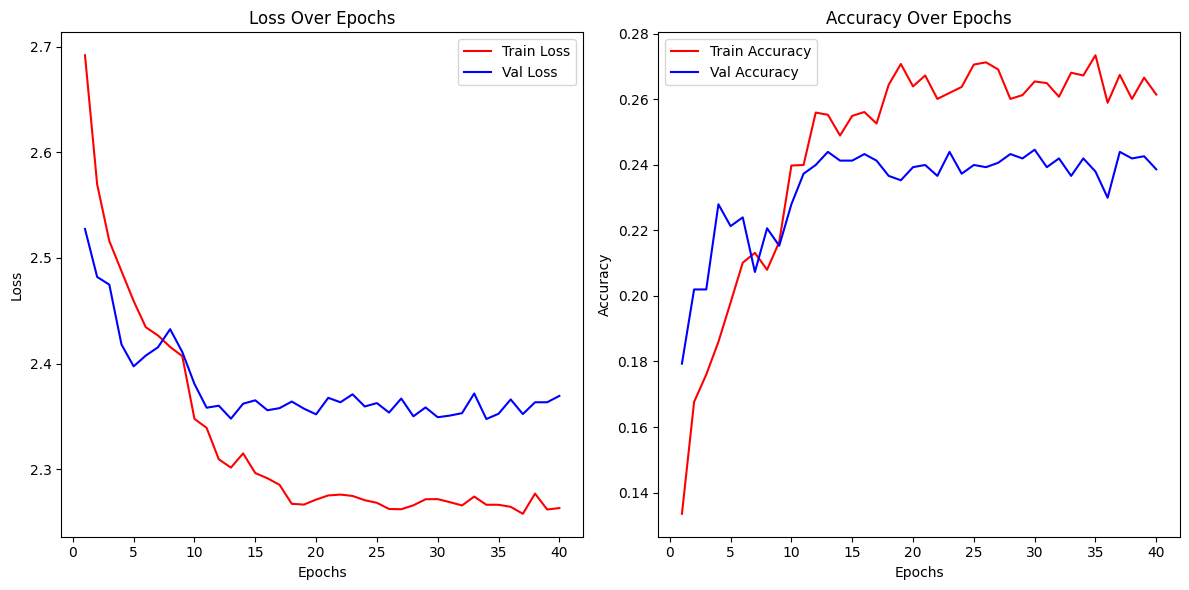

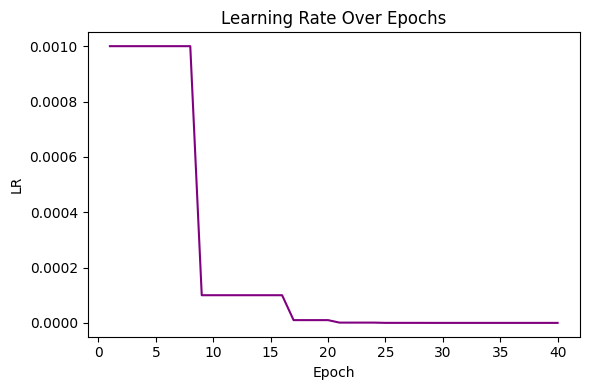

Test Accuracy: 0.2387

Neural Network Classifier Performance:

              precision    recall  f1-score   support

   n01768244     0.3396    0.1800    0.2353       100
   n02074367     0.2500    0.1600    0.1951       100
   n02099712     0.1915    0.2700    0.2241       100
   n02123045     0.2110    0.2300    0.2201       100
   n02123394     0.2041    0.2000    0.2020       100
   n02190166     0.3580    0.2900    0.3204       100
   n02206856     0.1493    0.1000    0.1198       100
   n02226429     0.2424    0.1600    0.1928       100
   n02423022     0.3333    0.2800    0.3043       100
   n02791270     0.2338    0.1800    0.2034       100
   n02917067     0.2832    0.6400    0.3926       100
   n03085013     0.3091    0.1700    0.2194       100
   n03126707     0.2319    0.3200    0.2689       100
   n03179701     0.1377    0.2300    0.1723       100
   n03250847     0.2297    0.1700    0.1954       100

    accuracy                         0.2387      1500
   macro avg     

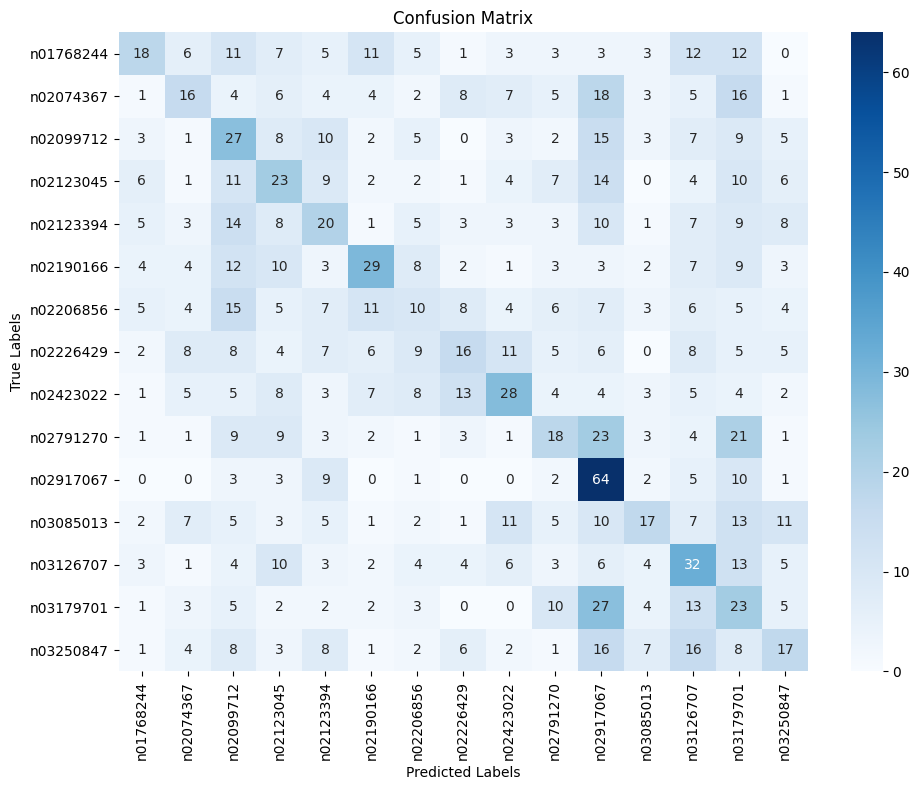


Saved outputs to:
 - /Users/maheshnilewar/Documents/Github/image_classification/results/models/phase3_fcnn_augmented_reduceonplateau.pth
 - /Users/maheshnilewar/Documents/Github/image_classification/results/figures/phase3_fcnn_augmented_reduceonplateau_training_curves.png
 - /Users/maheshnilewar/Documents/Github/image_classification/results/figures/phase3_fcnn_augmented_reduceonplateau_lr_curve.png
 - /Users/maheshnilewar/Documents/Github/image_classification/results/metrics/phase3_fcnn_augmented_reduceonplateau_classification_report.txt
 - /Users/maheshnilewar/Documents/Github/image_classification/results/figures/phase3_fcnn_augmented_reduceonplateau_confusion_matrix.png
 - /Users/maheshnilewar/Documents/Github/image_classification/results/metrics/phase3_fcnn_augmented_reduceonplateau_confusion_matrix.csv
 - /Users/maheshnilewar/Documents/Github/image_classification/results/metrics/phase3_fcnn_augmented_reduceonplateau_summary.json


In [12]:
import os
import json
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim

from torchvision import datasets, transforms
from torch.utils.data import DataLoader

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


# -----------------------
# Device
# -----------------------
device_type = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Device:", device_type)

# -----------------------
# Dataset directories
# -----------------------
train_dir = '/Users/maheshnilewar/Documents/Github/image_classification/train'
test_dir  = '/Users/maheshnilewar/Documents/Github/image_classification/test'

# -----------------------
# Results directories (YOUR LOCATION)
# -----------------------
RESULTS_DIR = "/Users/maheshnilewar/Documents/Github/image_classification/results"
FIG_DIR = os.path.join(RESULTS_DIR, "figures")
METRICS_DIR = os.path.join(RESULTS_DIR, "metrics")
MODELS_DIR = os.path.join(RESULTS_DIR, "models")
os.makedirs(FIG_DIR, exist_ok=True)
os.makedirs(METRICS_DIR, exist_ok=True)
os.makedirs(MODELS_DIR, exist_ok=True)

run_name = "phase3_fcnn_augmented_reduceonplateau"


# -----------------------
# Image transformations (train augmentation)
# -----------------------
train_transforms = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.Grayscale(num_output_channels=1),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.RandomCrop(128, padding=4),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])
])

# IMPORTANT: validation/test should NOT have random transforms
val_transforms = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.Grayscale(num_output_channels=1),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])
])

# -----------------------
# Load dataset
# -----------------------
train_data = datasets.ImageFolder(root=train_dir, transform=train_transforms)
val_data   = datasets.ImageFolder(root=test_dir,  transform=val_transforms)

# Class details
categories = train_data.classes
num_categories = len(categories)
print("Num classes:", num_categories)

# DataLoaders
train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
val_loader   = DataLoader(val_data, batch_size=32, shuffle=False)

# Get input size
temp_image, _ = next(iter(train_loader))
_, channels, height, width = temp_image.shape
input_size = height * width * channels
print("Input size:", input_size)


# -----------------------
# Define Neural Network Model
# -----------------------
class NeuralNet(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(NeuralNet, self).__init__()
        self.layers = nn.Sequential(
            nn.Flatten(),
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            nn.BatchNorm1d(hidden_dim),
            nn.Dropout(0.4),
            nn.Linear(hidden_dim, hidden_dim // 2),
            nn.ReLU(),
            nn.BatchNorm1d(hidden_dim // 2),
            nn.Dropout(0.4),
            nn.Linear(hidden_dim // 2, output_dim)
        )

    def forward(self, x):
        return self.layers(x)


# -----------------------
# Initialize model, loss, optimizer, scheduler
# -----------------------
model = NeuralNet(input_dim=input_size, hidden_dim=512, output_dim=num_categories).to(device_type)
loss_function = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-4)
lr_scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', patience=3, factor=0.1)

# -----------------------
# Training loop
# -----------------------
epochs = 40
train_loss_history, val_loss_history = [], []
train_acc_history, val_acc_history = [], []
lr_history = []

for epoch in range(epochs):
    # Training phase
    model.train()
    train_loss, correct_train, total_train = 0.0, 0, 0

    for imgs, lbls in train_loader:
        imgs, lbls = imgs.to(device_type), lbls.to(device_type)
        imgs = imgs.view(imgs.size(0), -1)  # keep your flattening

        optimizer.zero_grad()
        preds = model(imgs)
        loss = loss_function(preds, lbls)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        _, predicted = torch.max(preds, 1)
        correct_train += (predicted == lbls).sum().item()
        total_train += lbls.size(0)

    train_loss /= len(train_loader)
    train_accuracy = correct_train / total_train

    # Validation phase
    model.eval()
    val_loss, correct_val, total_val = 0.0, 0, 0

    with torch.no_grad():
        for imgs, lbls in val_loader:
            imgs, lbls = imgs.to(device_type), lbls.to(device_type)
            imgs = imgs.view(imgs.size(0), -1)
            preds = model(imgs)
            loss = loss_function(preds, lbls)

            val_loss += loss.item()
            _, predicted = torch.max(preds, 1)
            correct_val += (predicted == lbls).sum().item()
            total_val += lbls.size(0)

    val_loss /= len(val_loader)
    val_accuracy = correct_val / total_val

    lr_scheduler.step(val_loss)
    current_lr = optimizer.param_groups[0]["lr"]
    lr_history.append(current_lr)

    train_loss_history.append(train_loss)
    val_loss_history.append(val_loss)
    train_acc_history.append(train_accuracy)
    val_acc_history.append(val_accuracy)

    print(f"Epoch {epoch+1}/{epochs} | "
          f"Train Loss: {train_loss:.4f} | Train Acc: {train_accuracy:.4f} | "
          f"Val Loss: {val_loss:.4f} | Val Acc: {val_accuracy:.4f} | LR: {current_lr:.6f}")


# -----------------------
# Save the model
# -----------------------
model_path = os.path.join(MODELS_DIR, f"{run_name}.pth")
torch.save(model.state_dict(), model_path)
print("Model saved:", model_path)


# -----------------------
# Save curves (loss/accuracy)
# -----------------------
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(1, epochs + 1), train_loss_history, label='Train Loss', color='red')
plt.plot(range(1, epochs + 1), val_loss_history, label='Val Loss', color='blue')
plt.title("Loss Over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, epochs + 1), train_acc_history, label='Train Accuracy', color='red')
plt.plot(range(1, epochs + 1), val_acc_history, label='Val Accuracy', color='blue')
plt.title("Accuracy Over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.tight_layout()
curves_path = os.path.join(FIG_DIR, f"{run_name}_training_curves.png")
plt.savefig(curves_path, dpi=300, bbox_inches="tight")
plt.show()

# Optional: save LR curve
plt.figure(figsize=(6, 4))
plt.plot(range(1, epochs + 1), lr_history, color="purple")
plt.title("Learning Rate Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("LR")
plt.tight_layout()
lr_fig_path = os.path.join(FIG_DIR, f"{run_name}_lr_curve.png")
plt.savefig(lr_fig_path, dpi=300, bbox_inches="tight")
plt.show()


# -----------------------
# Model Evaluation
# -----------------------
model.eval()
predictions_list, labels_list = [], []

with torch.no_grad():
    for imgs, lbls in val_loader:
        imgs, lbls = imgs.to(device_type), lbls.to(device_type)
        imgs = imgs.view(imgs.size(0), -1)
        preds = model(imgs)
        _, predicted_lbls = torch.max(preds, 1)

        predictions_list.extend(predicted_lbls.cpu().numpy().tolist())
        labels_list.extend(lbls.cpu().numpy().tolist())

test_acc = accuracy_score(labels_list, predictions_list)
print(f"Test Accuracy: {test_acc:.4f}")

# Classification Report
report = classification_report(
    labels_list, predictions_list,
    target_names=categories,
    digits=4,
    zero_division=0
)
print("\nNeural Network Classifier Performance:\n")
print(report)

report_path = os.path.join(METRICS_DIR, f"{run_name}_classification_report.txt")
with open(report_path, "w") as f:
    f.write(report)
    f.write("\n\nTest Accuracy: " + str(test_acc))

# Confusion Matrix
conf_matrix = confusion_matrix(labels_list, predictions_list)

cm_csv_path = os.path.join(METRICS_DIR, f"{run_name}_confusion_matrix.csv")
np.savetxt(cm_csv_path, conf_matrix, delimiter=",")

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=categories, yticklabels=categories)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()

cm_fig_path = os.path.join(FIG_DIR, f"{run_name}_confusion_matrix.png")
plt.savefig(cm_fig_path, dpi=300, bbox_inches="tight")
plt.show()


# -----------------------
# Save summary.json
# -----------------------
summary = {
    "run_name": run_name,
    "phase": 3,
    "model": "FCNN (Flatten + Linear + BN + Dropout) + Augmentation + ReduceLROnPlateau",
    "train_dir": train_dir,
    "test_dir": test_dir,
    "image_size": [128, 128],
    "channels": int(channels),
    "input_size": int(input_size),
    "hidden_dim": 512,
    "dropout": 0.4,
    "epochs": epochs,
    "batch_size": 32,
    "optimizer": "Adam(lr=0.001, weight_decay=1e-4)",
    "scheduler": "ReduceLROnPlateau(mode=min, patience=3, factor=0.1)",
    "num_classes": int(num_categories),
    "test_accuracy": float(test_acc),
    "saved_model": model_path,
    "saved_curves": curves_path,
    "saved_lr_curve": lr_fig_path,
    "saved_report": report_path,
    "saved_confusion_matrix_png": cm_fig_path,
    "saved_confusion_matrix_csv": cm_csv_path
}

summary_path = os.path.join(METRICS_DIR, f"{run_name}_summary.json")
with open(summary_path, "w") as f:
    json.dump(summary, f, indent=2)

print("\nSaved outputs to:")
print(" -", model_path)
print(" -", curves_path)
print(" -", lr_fig_path)
print(" -", report_path)
print(" -", cm_fig_path)
print(" -", cm_csv_path)
print(" -", summary_path)